In [46]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import homogeneity_score


import common
import DimensionalityReduction.DimensionalityReductionDatasets as dr_datasets
from data.faces.faces_data import get_faces_dataset, get_faces_dataset_with_all_labels

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Faces"

In [47]:
filenames_train, filenames_test, X_train_faces, X_test_faces, y_train_faces, y_test_faces =\
get_faces_dataset_with_all_labels()

reload(dr_datasets)
pca_faces, _ = dr_datasets.get_faces_pca()

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Running PCA for 98 components


In [3]:
pca_faces.shape[1]

98

In [4]:
reload(common)
n = pca_faces.shape[1]
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(pca_faces, n)

For n_clusters = 2 average silhouette_score: 0.057715793432869304 time taken: 0.03699994087219238s
For n_clusters = 3 average silhouette_score: 0.051724846221827284 time taken: 0.1005709171295166s
For n_clusters = 4 average silhouette_score: 0.03924094898754249 time taken: 0.07203459739685059s
For n_clusters = 5 average silhouette_score: 0.02229749205759144 time taken: 0.09015345573425293s
For n_clusters = 6 average silhouette_score: 0.025568720747117055 time taken: 0.08940601348876953s
For n_clusters = 7 average silhouette_score: 0.016961675741597914 time taken: 0.09327006340026855s
For n_clusters = 8 average silhouette_score: 0.02535917392845718 time taken: 0.08557319641113281s
For n_clusters = 9 average silhouette_score: 0.024383955175272955 time taken: 0.07583403587341309s
For n_clusters = 10 average silhouette_score: 0.024959961145522475 time taken: 0.10949277877807617s
For n_clusters = 11 average silhouette_score: 0.02579499722223474 time taken: 0.09881472587585449s
For n_cluster

For n_clusters = 85 average silhouette_score: -0.006735824838699062 time taken: 0.14737319946289062s
For n_clusters = 86 average silhouette_score: -0.006364335678967125 time taken: 0.1200861930847168s
For n_clusters = 87 average silhouette_score: -0.010943404114761185 time taken: 0.26451659202575684s
For n_clusters = 88 average silhouette_score: -0.0102334915988269 time taken: 0.231856107711792s
For n_clusters = 89 average silhouette_score: -0.01037168571006007 time taken: 0.23354363441467285s
For n_clusters = 90 average silhouette_score: -0.00869851950752878 time taken: 0.12629365921020508s
For n_clusters = 91 average silhouette_score: -0.014028423888965249 time taken: 0.6062743663787842s
For n_clusters = 92 average silhouette_score: -0.01468206608656466 time taken: 0.11863493919372559s
For n_clusters = 93 average silhouette_score: -0.009344725333379758 time taken: 0.14803194999694824s
For n_clusters = 94 average silhouette_score: -0.010634666412044498 time taken: 0.13231778144836426s

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


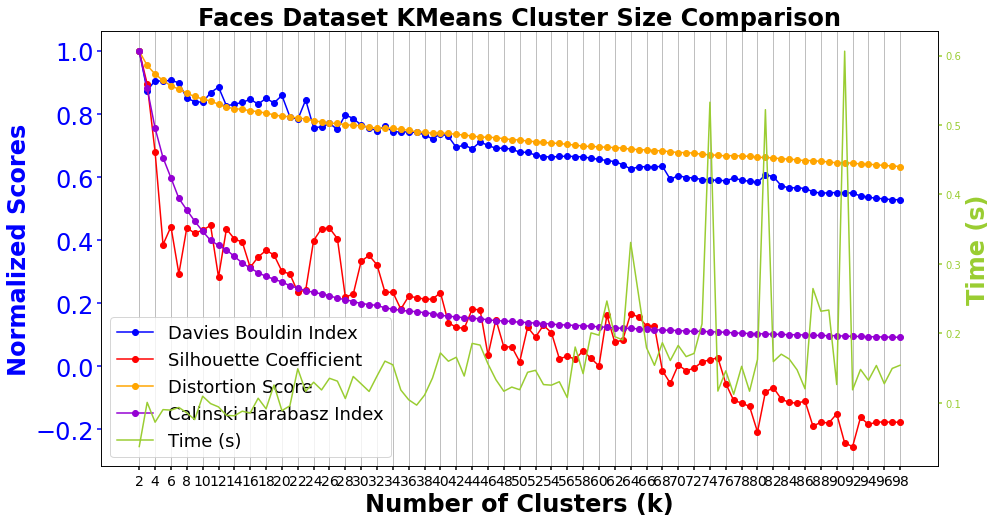

In [48]:
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


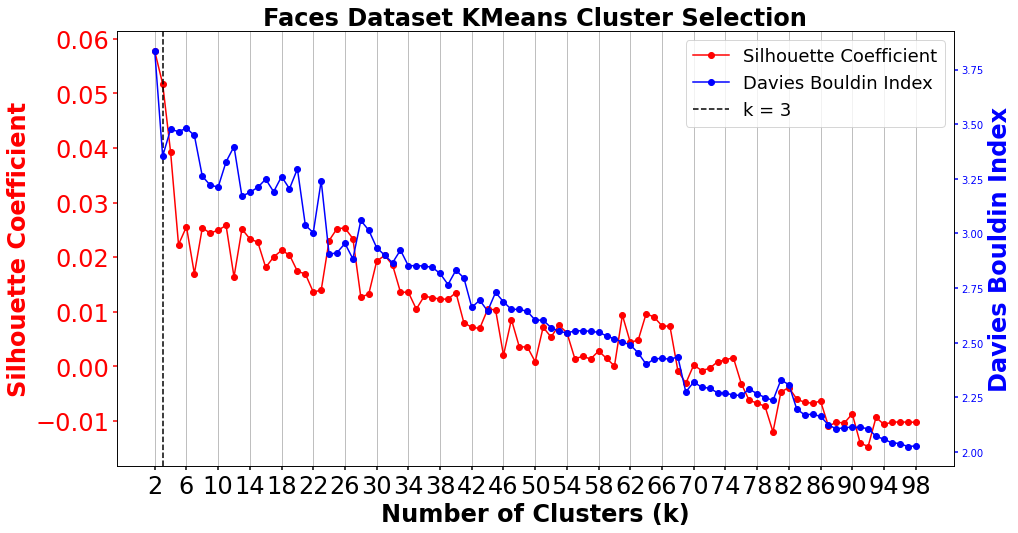

In [49]:
reload(common)
best_k = 3
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET)

For n_clusters = 3 average silhouette_score: 0.05039261120791731 time taken: 0.18994998931884766s


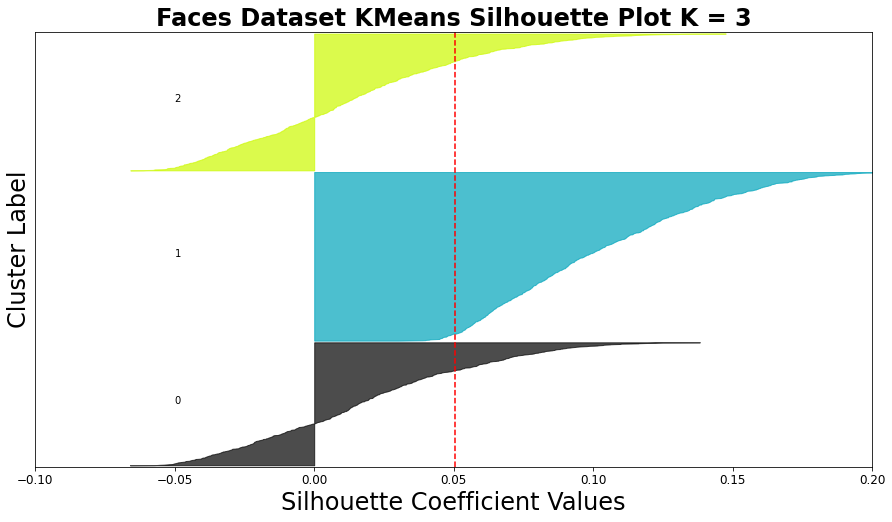

In [50]:
reload(common)
common.plot_silhouette_kmeans(pca_faces, best_k, DATASET, xlim=[-0.1, 0.2])

In [51]:
start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(pca_faces)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_faces['km_labels']=km.labels_
pca_faces_km = pd.DataFrame(pca_faces.copy())
pca_faces_km['km_labels'] = km.labels_
pca_faces_km['sex'] = y_train_faces['sex']
pca_faces_km['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(km.labels_, y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(km.labels_, y_train_faces['race']))
print("Silhouette Score: {}".format(silhouette_score(pca_faces, km.labels_)))

Time Taken 0.18667054176330566 s
homogeneity_score sex:  0.0006976428936908696
homogeneity_score race:  0.003228177343003334
Silhouette Score: 0.05039261120791731


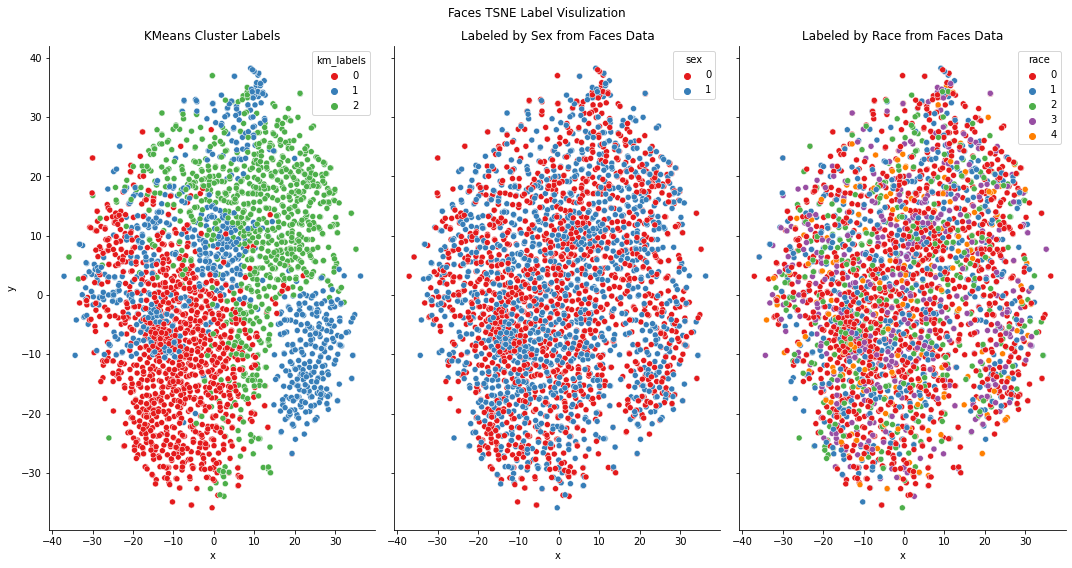

In [20]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(pca_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

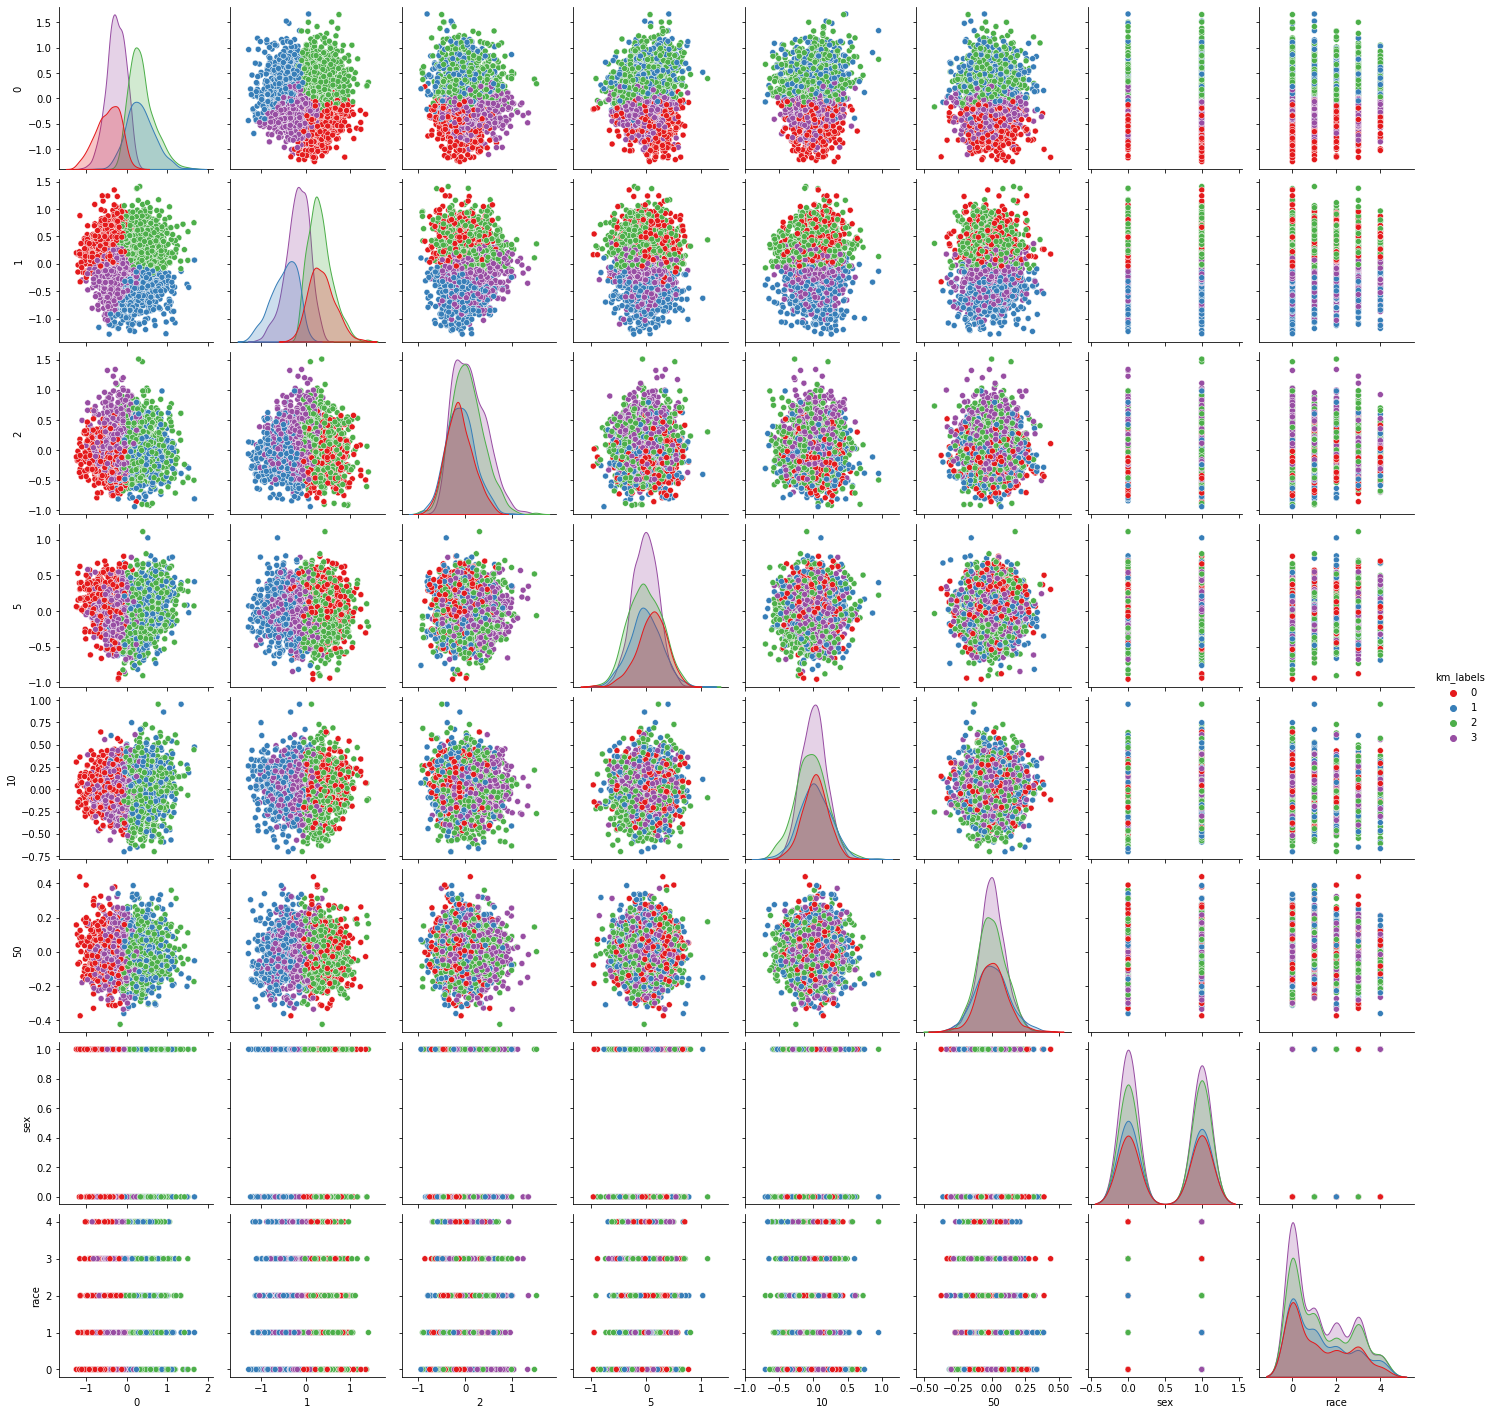

In [39]:
sns.pairplot(pca_faces_km[[0, 1, 2, 5, 10, 50, "sex", "race", "km_labels"]], hue="km_labels", palette="Set1")

# Expectation Maximization

In [22]:
reload(common)
em_n = pca_faces.shape[1]
n_components = np.arange(2, em_n)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(pca_faces, em_n)

For n_clusters = 2 average silhouette_score: 0.05102164321943367 time taken: 1.085808277130127s
For n_clusters = 3 average silhouette_score: 0.021695428152013238 time taken: 1.977538824081421s
For n_clusters = 4 average silhouette_score: 0.03195779989689781 time taken: 1.191220760345459s
For n_clusters = 5 average silhouette_score: 0.015300701920103566 time taken: 1.3981757164001465s
For n_clusters = 6 average silhouette_score: 0.01919671541827034 time taken: 1.1280035972595215s
For n_clusters = 7 average silhouette_score: 0.009034851005891902 time taken: 1.1985740661621094s
For n_clusters = 8 average silhouette_score: 0.017804469464340993 time taken: 1.132749319076538s
For n_clusters = 9 average silhouette_score: 0.016164094643749766 time taken: 1.4284603595733643s
For n_clusters = 10 average silhouette_score: 0.015878698951314493 time taken: 1.312854290008545s
For n_clusters = 11 average silhouette_score: 0.012819633197227218 time taken: 1.1964571475982666s
For n_clusters = 12 averag

For n_clusters = 85 average silhouette_score: -2.452855931164431e-05 time taken: 2.6971938610076904s
For n_clusters = 86 average silhouette_score: -0.0017965331022701068 time taken: 2.9081640243530273s
For n_clusters = 87 average silhouette_score: -0.0013259818213037795 time taken: 3.1733169555664062s
For n_clusters = 88 average silhouette_score: -0.0015153296707007256 time taken: 2.630481481552124s
For n_clusters = 89 average silhouette_score: -0.002271454563416683 time taken: 2.66217303276062s
For n_clusters = 90 average silhouette_score: -0.0017774605246708764 time taken: 2.576702356338501s
For n_clusters = 91 average silhouette_score: -0.0021419797032821903 time taken: 3.4021265506744385s
For n_clusters = 92 average silhouette_score: -0.0025870228606250747 time taken: 3.105170726776123s
For n_clusters = 93 average silhouette_score: -9.319147601783817e-05 time taken: 2.8979568481445312s
For n_clusters = 94 average silhouette_score: -0.0009614780911242057 time taken: 2.69629931449890

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:250: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


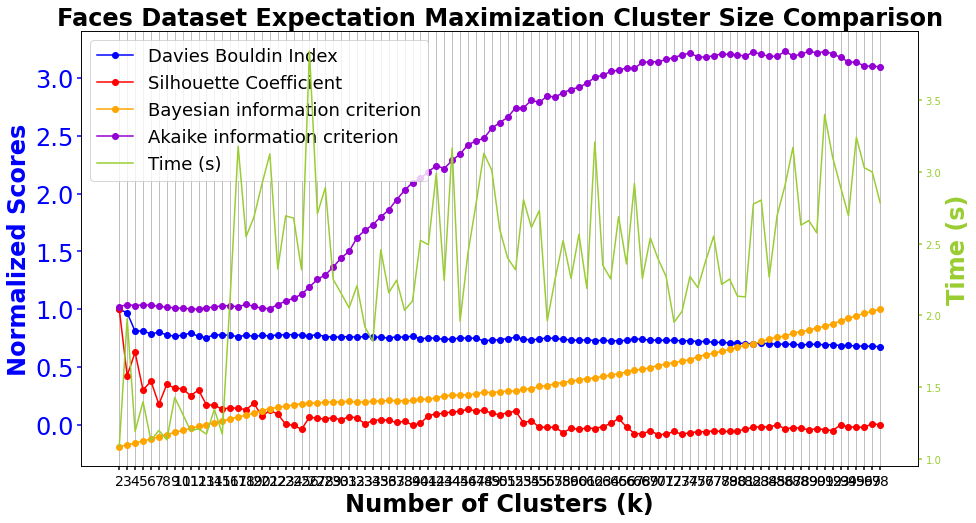

In [52]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


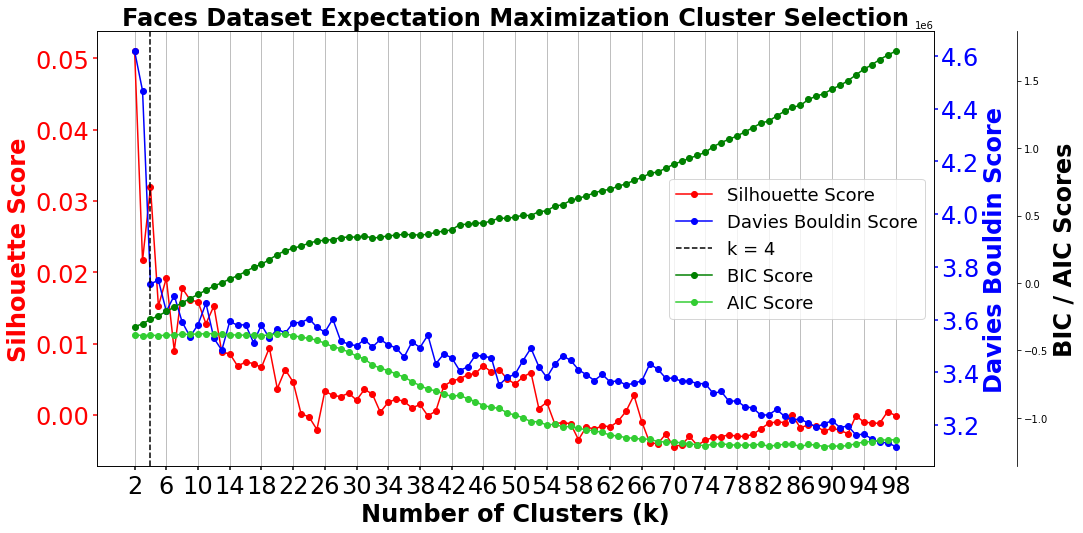

In [53]:
reload(common)
best_k = 4
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=4)

For n_clusters = 4 average silhouette_score: 0.029734044770356707 time taken: 1.2752153873443604s


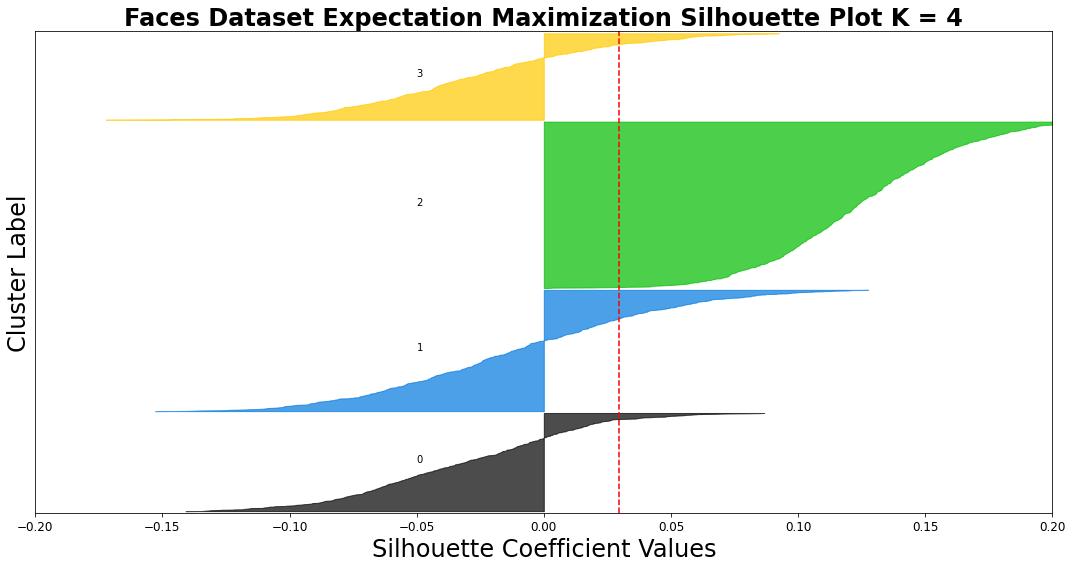

In [54]:
reload(common)
best_k=4
common.plot_silhouette_em(pca_faces, best_k, DATASET, xlim=[-0.2, 0.2])

In [55]:
start_time = time.time()
em_model = GaussianMixture(best_k, covariance_type='full', random_state=42)
em_model.fit(pca_faces)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_faces['em_labels']=em_model.predict(pca_faces)
pca_faces_gm = pd.DataFrame(pca_faces.copy())
pca_faces_gm['em_labels'] = em_model.predict(pca_faces)
pca_faces_gm['sex'] = y_train_faces['sex']
pca_faces_gm['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(em_model.predict(pca_faces), y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(em_model.predict(pca_faces), y_train_faces['race']))
print("Silhouette Score: {}".format(silhouette_score(pca_faces, em_model.predict(pca_faces))))

time taken 1.7111005783081055 s
homogeneity_score sex:  0.00016521235972499033
homogeneity_score race:  0.001416408172129381
Silhouette Score: 0.029904148823887197


In [56]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(pca_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

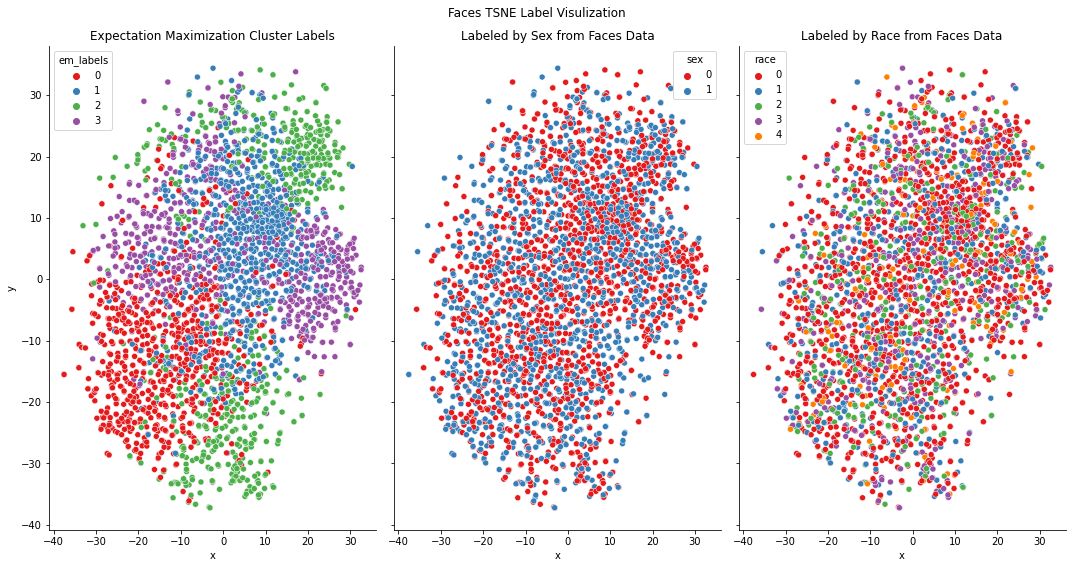

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

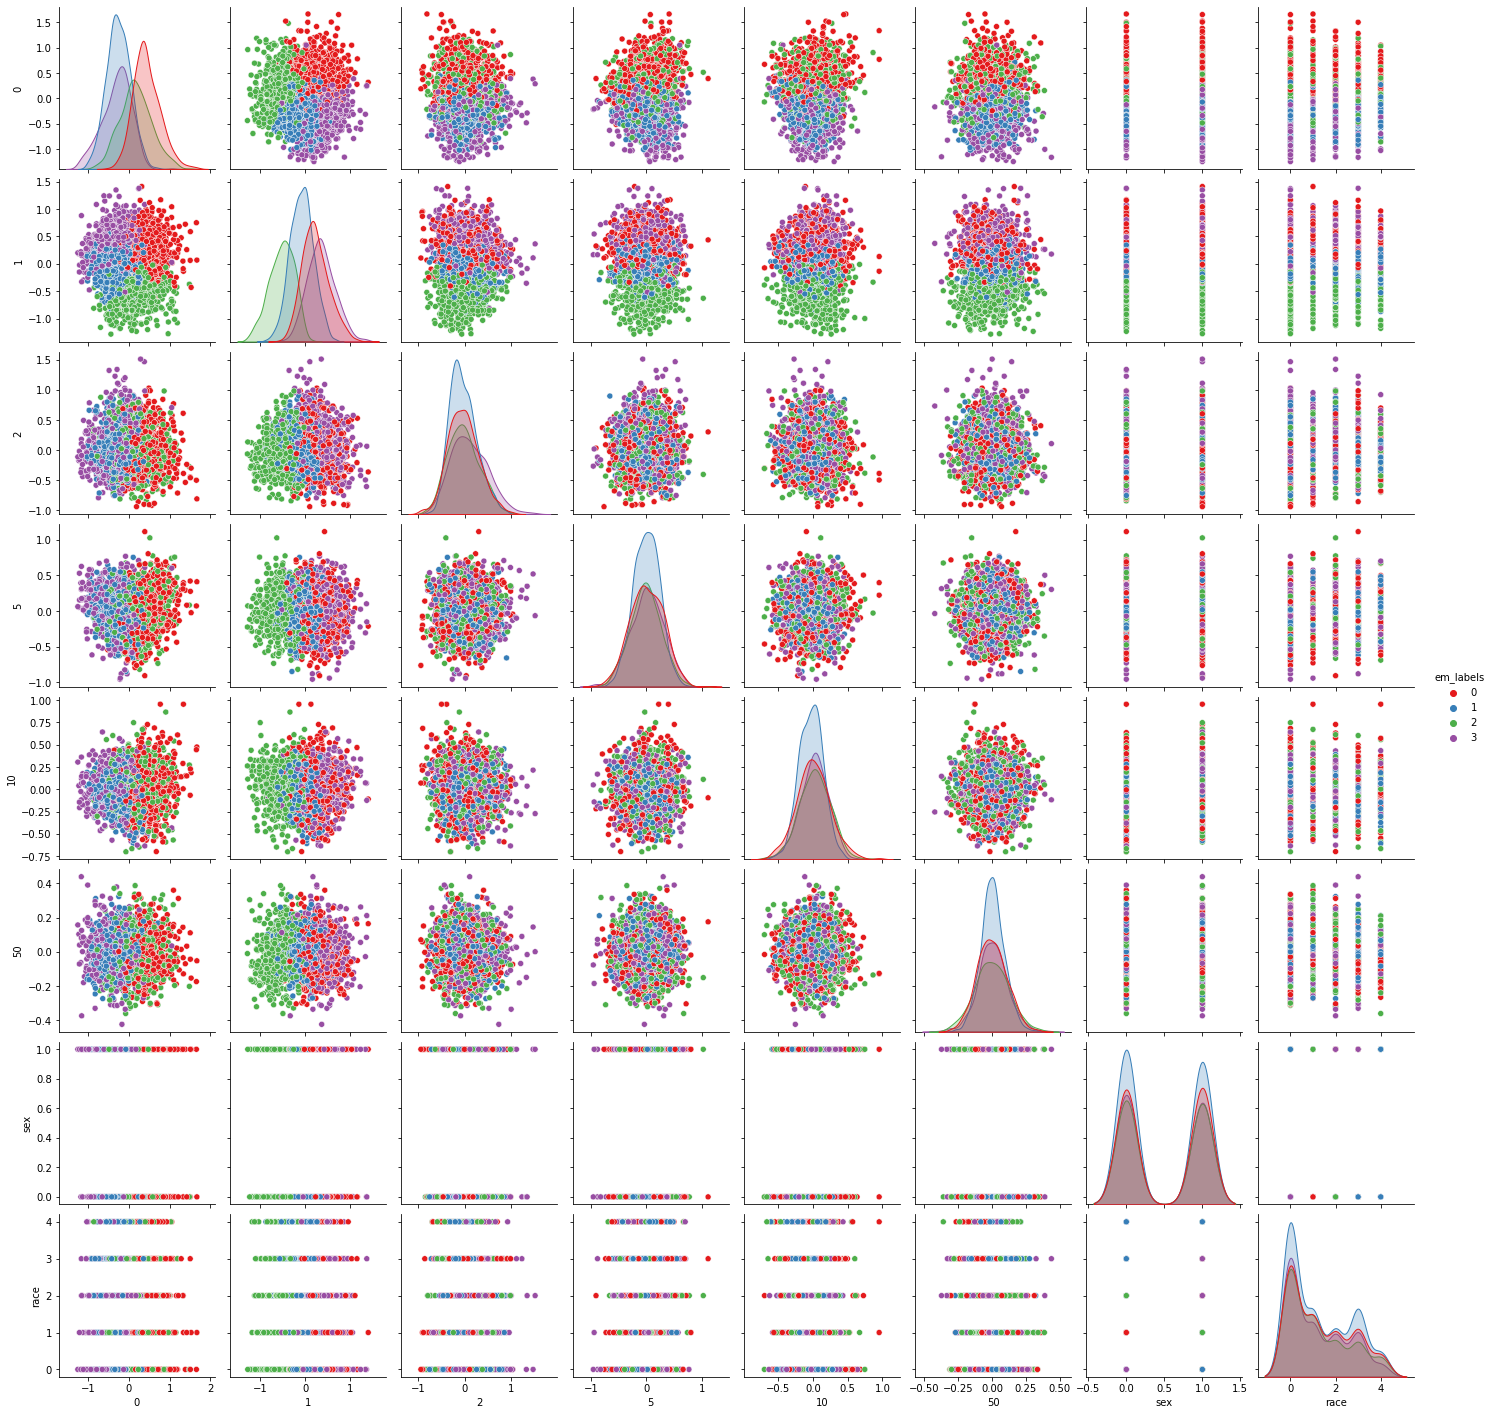

In [42]:
sns.pairplot(pca_faces_gm[[0, 1, 2, 5, 10, 50, "sex", "race", "em_labels"]], hue="em_labels", palette="Set1")